In [1]:
import numpy as np
import pandas as pd
import skimage.io
import matplotlib.pyplot as plt

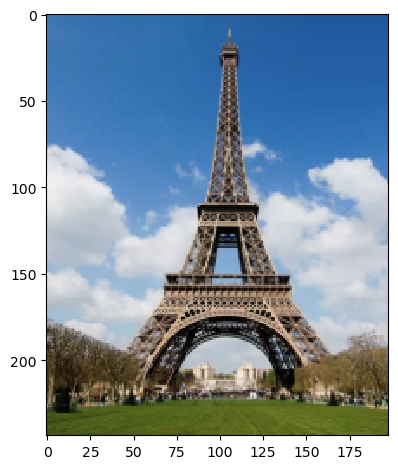

In [2]:
img = skimage.io.imread("image.png")
skimage.io.imshow(img)
plt.show()

In [3]:
shape = img.shape
shape

(244, 198, 3)

In [4]:
# img[1:50] = [255, 140, 0]

In [5]:
# skimage.io.imshow(img)
# plt.show()

In [6]:
img.shape

(244, 198, 3)

In [7]:
img = img.reshape(-1, 3)

In [8]:
img.shape

(48312, 3)

In [9]:
color_scheme = [(60, 179, 113),  # SpringGreen
  (0, 191, 255),   # DeepSkyBlue
  (255, 255, 0),   # Yellow
  (255, 0, 0),     # Red
  (0, 0, 0),       # Black
  (169, 169, 169), # DarkGray
  (255, 140, 0),   # DarkOrange
  (128, 0, 128),   # Purple
  (255, 192, 203), # Pink
  (255, 255, 255)  # White
]



## For k = 2

In [10]:
img2 = img.copy() 
img2 = img2 / 255.0
#img2

In [11]:
def get_euclidean_dist(matrix, vector):
    #first convert the dataframe into a matrix, and the testing Series into a vector
    new_vector = np.array(vector)
    
    #calculate distance using norm of vector
    distances = np.linalg.norm(matrix - new_vector, axis=1)
    return distances


In [12]:
k_values = [2, 3, 6, 10]

#list of the initial centroids for each of the k values above 
centroids_vals = {2: [[0, 0, 0], [0.1, 0.1, 0.1]], 
                  3: [[0, 0, 0], [0.1, 0.1, 0.1], [0.2, 0.2, 0.2]],
                 6: [[0, 0, 0], [0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5, 0.5]],
                 10: [[0, 0, 0], [0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5, 0.5], 
    [0.6, 0.6, 0.6], [0.7, 0.7, 0.7], [0.8, 0.8, 0.8], [0.9, 0.9, 0.9]] }

In [13]:
def kmeans(data, centroids, max_iterations):
    for i in range(max_iterations):
        #uses euclidean distance to find the distance that each pixel in the image is from the initial centroids
        #it stores the distance that each pixel is from the first centroid in one vector, and the distance that each pixel
        #is from the second centroid in a second vector
        lst_of_all_distances = [get_euclidean_dist(data, centroid) for centroid in centroids]
        #print(lst_of_all_distances)
        
        #Now that we have the distances stored in two separate vectors, we can pick which distance is minimal for each
        #pixel. This will tell us whether the pixel is closer to one centroid over the other, and group it in a cluster
        #we can do this by using the np.argmin function and set axis = 0 since we are comparing two different vectors.
        clusters = np.argmin(np.array(lst_of_all_distances), axis=0)
        #print(clusters)
        new_centroids = np.array([data[clusters == i].mean(axis=0) for i in range(len(centroids))])
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return centroids, clusters

centroids, clusters = kmeans(img2, centroids_vals[2], 50)
print(centroids)
print(clusters)

[[0.31120906 0.29824088 0.17983497]
 [0.46592916 0.59360754 0.73560107]]
[1 1 1 ... 0 0 0]


In [14]:
# Calculate SSE
def calculate_sse(data, centroids, clusters):
    sse = 0
    for i in range(len(centroids)):
        distances = get_euclidean_dist(data[clusters == i], centroids[i])
        sse += np.sum(distances ** 2)
    return sse

In [15]:
calculate_sse(img2, centroids, clusters)

4678.113042172469

In [16]:
colors = np.array([[60/255, 179/255, 113/255], [0, 191/255, 1]]) # colors for the clusters

for i in range(len(colors)):
    img2[clusters == i] = colors[i]

print(img2)
# skimage.io.imshow(img)
# plt.show()    

[[0.         0.74901961 1.        ]
 [0.         0.74901961 1.        ]
 [0.         0.74901961 1.        ]
 ...
 [0.23529412 0.70196078 0.44313725]
 [0.23529412 0.70196078 0.44313725]
 [0.23529412 0.70196078 0.44313725]]


In [17]:
img2.shape

(48312, 3)

In [18]:
img2 = img2.reshape(shape)
img2.shape

(244, 198, 3)

C:\Users\Irochka\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


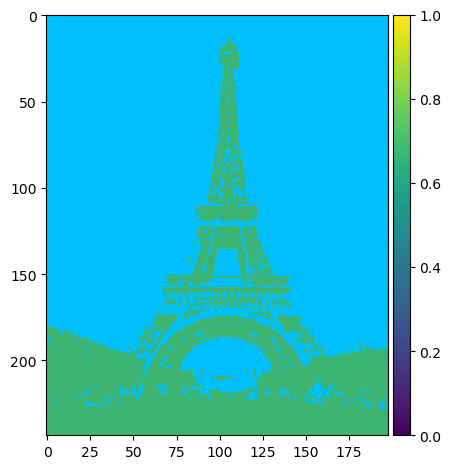

In [19]:
skimage.io.imshow(img2)
plt.show() 

## For k = 3:

In [20]:
img3 = img.copy()
img3 = img3 / 255

centroids, clusters = kmeans(img3, centroids_vals[3], 50)
print(centroids)
print(clusters)

[[0.16731837 0.14328881 0.09854599]
 [0.39653251 0.38425246 0.2395013 ]
 [0.46379596 0.59623813 0.74336013]]
[2 2 2 ... 1 1 1]


In [21]:
calculate_sse(img3, centroids, clusters)

4336.465222032641

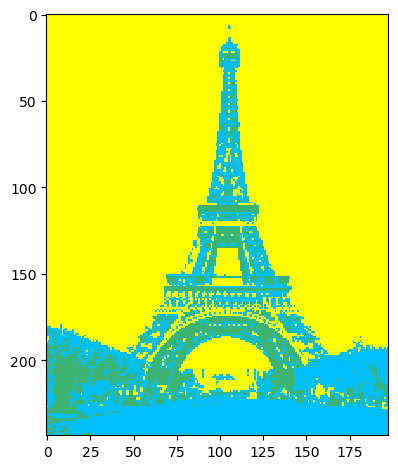

In [22]:
colors = np.array([[60/255, 179/255, 113/255], [0, 191/255, 1], [1, 1, 0] ]) # colors for the clusters

for i in range(len(colors)):
    img3[clusters == i] = colors[i]

#print(img3)
img3 = img3.reshape(shape)
skimage.io.imshow(img3)
plt.show()    

## For k = 6:

In [23]:
img6 = img.copy()
img6 = img6 / 255

centroids, clusters = kmeans(img6, centroids_vals[6], 50)
print(centroids)
print(clusters)

[[0.14116339 0.1172404  0.08497009]
 [0.34937843 0.34862785 0.18314644]
 [0.54900534 0.49277037 0.43385003]
 [0.57867729 0.66640492 0.76522938]
 [0.2082696  0.43989584 0.69171173]
 [0.79013006 0.8115641  0.84164948]]
[4 4 4 ... 1 1 1]


In [24]:
calculate_sse(img6, centroids, clusters)

549.6161192200376

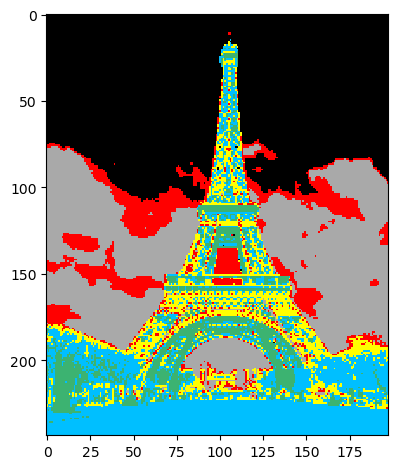

In [25]:
colors = np.array([[60/255, 179/255, 113/255], [0, 191/255, 1], [1, 1, 0], 
                   [1, 0, 0], [0, 0, 0], [169/255, 169/255, 169/255]]) 

for i in range(len(colors)):
    img6[clusters == i] = colors[i]

#print(img6)
img6 = img6.reshape(shape)
skimage.io.imshow(img6)
plt.show()  

## For k = 10:

In [26]:
img10 = img.copy()
img10 = img10 / 255

centroids, clusters = kmeans(img10, centroids_vals[10], 50)
print(centroids)
print(clusters)

[[0.10602548 0.08644457 0.06290169]
 [0.27970509 0.2430503  0.18057219]
 [0.35048248 0.39143588 0.12762226]
 [0.44683562 0.3980475  0.33680739]
 [0.16401031 0.39949166 0.66029683]
 [0.2520083  0.4818465  0.725383  ]
 [0.63358838 0.57195636 0.51305322]
 [0.44051546 0.60033736 0.78207895]
 [0.70881237 0.75561487 0.80715826]
 [0.83379907 0.84556558 0.86854406]]
[5 5 5 ... 2 2 2]


In [27]:
calculate_sse(img10, centroids, clusters)

253.84711145254835

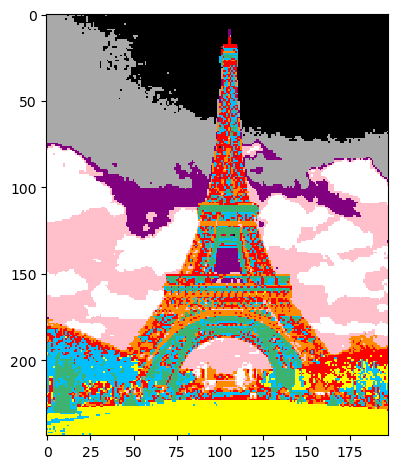

In [28]:
colors = np.array([[60/255, 179/255, 113/255], [0, 191/255, 1], [1, 1, 0], 
                   [1, 0, 0], [0, 0, 0], [169/255, 169/255, 169/255], [1, 140/255, 0], [128/255, 0, 128/255],
                   [1, 192/255, 203/255], [1, 1, 1] ]) 

for i in range(len(colors)):
    img10[clusters == i] = colors[i]

#print(img10)
img10 = img10.reshape(shape)
skimage.io.imshow(img10)
plt.show()  

In [29]:
#Test the code

In [30]:
lst_of_all_distances = [get_euclidean_dist(img, centroid) for centroid in centroids_vals[2]]
lst_of_all_distances

[array([217.83020911, 217.02304025, 217.83020911, ..., 137.16413525,
        131.15258289, 146.40355187]),
 array([217.67046194, 216.86315962, 217.67046194, ..., 137.00521888,
        130.99477089, 146.24373491])]

In [31]:
clusters = np.argmin(np.array(lst_of_all_distances), axis=0)
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
img[clusters == 1].mean(axis=0)

array([108.43710021, 131.55615128, 150.28633531])

## Problem 2

## Denodogram

C:\Users\Irochka\AppData\Local\Temp\ipykernel_34916\3256331404.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(ytdist, "single")


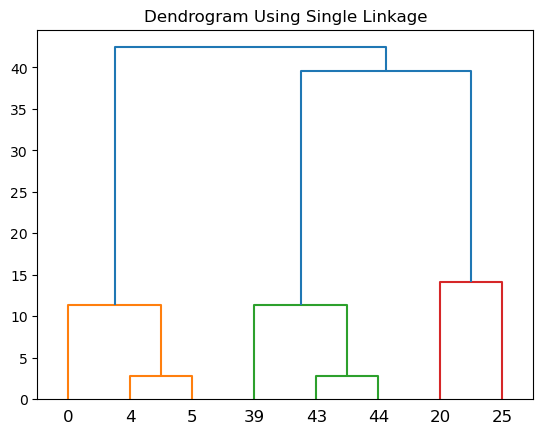

In [33]:
import pandas as pd
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
data = [[0, 0], [4, 0], [5, 0],[20, 0],[25, 0], [39,0], [43, 0], [44, 0]]
points=["0","4","5","20","25","39", "43", "44"]
df = pd.DataFrame(data, columns=['xcord', 'ycord'],index=points)
ytdist=pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
linkage_matrix = linkage(ytdist, "single")
dendrogram(linkage_matrix, labels=["0","4","5","20","25","39", "43", "44"])
plt.title("Dendrogram Using Single Linkage")
plt.show()

## Problem 3

In [34]:
# a1 = np.array([1,1])
# a2 = np.array([3,3])
# a3 = np.array([8, 8])
# a = np.array([a1, a2, a3])
# print(a)

# np.mean(a, axis = 0)

In [35]:
cluster1 = np.array([[1,1], [2,2], [3,3]])
cluster2 = np.array([[5,2], [6,2], [7,2], [8,2], [9,2]])

print(cluster1, "\n")
print(cluster2)

[[1 1]
 [2 2]
 [3 3]] 

[[5 2]
 [6 2]
 [7 2]
 [8 2]
 [9 2]]


### 3a)

In [36]:
m1 = np.mean(cluster1, axis = 0)
m2 = np.mean(cluster2, axis = 0)
print(f"The mean vector of cluster1 is: m1 = {m1}, \n")
print(f"The mean vector of cluster2 is: m2 = {m2}")

The mean vector of cluster1 is: m1 = [2. 2.], 

The mean vector of cluster2 is: m2 = [7. 2.]


### 3b)

In [37]:
m = (3*m1 + 5*m2) / 8
print(f"The total mean vector is: m = {m}")

The total mean vector is: m = [5.125 2.   ]


## 3c)

In [38]:
#S1 Calculation:


diff_matrix = np.subtract(cluster1, m1)
print(diff_matrix, "\n")
print(diff_matrix.T)

[[-1. -1.]
 [ 0.  0.]
 [ 1.  1.]] 

[[-1.  0.  1.]
 [-1.  0.  1.]]


In [39]:
S1 = np.matmul(diff_matrix.T, diff_matrix)
S1

array([[2., 2.],
       [2., 2.]])

In [40]:
diff_matrix2 = np.subtract(cluster2, m2)
print(diff_matrix2, "\n")
print(diff_matrix2.T)

[[-2.  0.]
 [-1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]] 

[[-2. -1.  0.  1.  2.]
 [ 0.  0.  0.  0.  0.]]


In [41]:
S2 = np.matmul(diff_matrix2.T, diff_matrix2)
S2

array([[10.,  0.],
       [ 0.,  0.]])

## 3d)

In [42]:
Sw = S1 + S2
Sw

array([[12.,  2.],
       [ 2.,  2.]])

## 3e)

In [43]:
SB = np.array([(m1-m).T @ (m1-m) *3, 0, 0, 0]) + np.array([(m2-m).T @ (m2-m) *5, 0, 0, 0])
SB = SB.reshape(2, 2)
SB

array([[46.875,  0.   ],
       [ 0.   ,  0.   ]])

## 3f)

In [44]:
np.trace(SB)

46.875

In [45]:
np.trace(Sw)

14.0

In [46]:
scatter_criterion = np.trace(SB) / np.trace(Sw)
scatter_criterion

3.3482142857142856